In [1]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# Reading in the dataset
df= pd.read_csv('hotel.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Issues to fix

1. Null values in company
2. Null values in country
3. Null values in agent
4. Undefined in meal,market segment, distribution channel, 
5. Null values in children
6. 

In [4]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [5]:
# checking for missing values in children
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [6]:
# Checking the location of children with nan values in relation with other attributes 
#df.loc[:,['adults','children','babies','is_canceled']]

In [7]:
# Checking the location of children with nan values in relation with other attributes based on the location of the missing values 
#df[df['children'].isna()].loc[:,['adults','children','babies','is_canceled']]

In [8]:
# Checking for unique values in children
sorted(df['children'].unique())

[0.0, 1.0, 2.0, 3.0, 10.0, nan]

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# Checking for unique values in date of reservation 
sorted(df['reservation_status_date'].unique())

['2014-10-17',
 '2014-11-18',
 '2015-01-01',
 '2015-01-02',
 '2015-01-18',
 '2015-01-20',
 '2015-01-21',
 '2015-01-22',
 '2015-01-28',
 '2015-01-29',
 '2015-01-30',
 '2015-02-02',
 '2015-02-05',
 '2015-02-06',
 '2015-02-09',
 '2015-02-10',
 '2015-02-11',
 '2015-02-12',
 '2015-02-17',
 '2015-02-19',
 '2015-02-20',
 '2015-02-23',
 '2015-02-24',
 '2015-02-25',
 '2015-02-26',
 '2015-02-27',
 '2015-03-03',
 '2015-03-04',
 '2015-03-05',
 '2015-03-06',
 '2015-03-09',
 '2015-03-10',
 '2015-03-11',
 '2015-03-12',
 '2015-03-13',
 '2015-03-17',
 '2015-03-18',
 '2015-03-23',
 '2015-03-24',
 '2015-03-25',
 '2015-03-28',
 '2015-03-29',
 '2015-03-30',
 '2015-03-31',
 '2015-04-02',
 '2015-04-03',
 '2015-04-04',
 '2015-04-05',
 '2015-04-06',
 '2015-04-07',
 '2015-04-08',
 '2015-04-10',
 '2015-04-11',
 '2015-04-13',
 '2015-04-14',
 '2015-04-15',
 '2015-04-16',
 '2015-04-17',
 '2015-04-18',
 '2015-04-20',
 '2015-04-21',
 '2015-04-22',
 '2015-04-23',
 '2015-04-24',
 '2015-04-25',
 '2015-04-27',
 '2015-04-

In [11]:
sorted(df['reservation_status'].unique())

['Canceled', 'Check-Out', 'No-Show']

In [12]:
sorted(df['total_of_special_requests'].unique())

[0, 1, 2, 3, 4, 5]

In [13]:
sorted(df['required_car_parking_spaces'].unique())

[0, 1, 2, 3, 8]

In [14]:
# Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying night
sorted(df['adr'].unique())

[-6.38,
 0.0,
 0.26,
 0.5,
 1.0,
 1.29,
 1.48,
 1.56,
 1.6,
 1.8,
 2.0,
 2.4,
 3.0,
 3.38,
 4.0,
 4.5,
 5.0,
 5.2,
 5.25,
 6.0,
 6.4,
 6.5,
 6.67,
 6.9,
 7.0,
 7.8,
 8.0,
 8.34,
 8.43,
 9.0,
 9.14,
 9.67,
 9.71,
 10.0,
 10.5,
 10.8,
 11.53,
 11.75,
 12.0,
 12.5,
 13.0,
 14.0,
 15.0,
 16.0,
 16.92,
 17.5,
 17.6,
 18.0,
 18.5,
 18.6,
 19.0,
 19.09,
 19.15,
 19.35,
 20.0,
 20.88,
 21.0,
 21.37,
 21.5,
 22.0,
 22.11,
 22.4,
 22.5,
 22.86,
 23.0,
 23.5,
 23.6,
 23.7,
 23.93,
 24.0,
 24.5,
 24.7,
 24.79,
 24.8,
 24.83,
 24.87,
 24.94,
 24.95,
 25.0,
 25.11,
 25.42,
 25.5,
 25.64,
 25.65,
 25.92,
 26.0,
 26.1,
 26.23,
 26.26,
 26.33,
 26.35,
 26.5,
 26.64,
 26.93,
 26.95,
 26.99,
 27.0,
 27.07,
 27.35,
 27.36,
 27.43,
 27.5,
 27.53,
 27.54,
 27.56,
 27.6,
 27.69,
 27.81,
 27.9,
 28.0,
 28.1,
 28.3,
 28.33,
 28.5,
 28.64,
 28.71,
 28.79,
 28.8,
 29.0,
 29.01,
 29.06,
 29.11,
 29.16,
 29.3,
 29.34,
 29.41,
 29.6,
 29.72,
 29.73,
 29.75,
 29.78,
 29.8,
 29.96,
 29.97,
 30.0,
 30.03,
 30.24,
 30.

In [15]:
sorted(df['customer_type'].unique())

['Contract', 'Group', 'Transient', 'Transient-Party']

In [16]:
sorted(df['days_in_waiting_list'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 83,
 84,
 85,
 87,
 89,
 91,
 92,
 93,
 96,
 97,
 98,
 99,
 100,
 101,
 105,
 107,
 108,
 109,
 111,
 113,
 116,
 117,
 120,
 121,
 122,
 125,
 142,
 147,
 150,
 154,
 160,
 162,
 165,
 167,
 174,
 175,
 176,
 178,
 183,
 185,
 187,
 193,
 207,
 215,
 223,
 224,
 236,
 259,
 330,
 379,
 391]

In [17]:
sorted(df['company'].unique())

[nan,
 6.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 14.0,
 16.0,
 18.0,
 20.0,
 22.0,
 28.0,
 29.0,
 31.0,
 32.0,
 34.0,
 35.0,
 37.0,
 38.0,
 39.0,
 40.0,
 42.0,
 43.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 51.0,
 52.0,
 53.0,
 54.0,
 59.0,
 61.0,
 62.0,
 64.0,
 65.0,
 67.0,
 68.0,
 71.0,
 72.0,
 73.0,
 76.0,
 77.0,
 78.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 88.0,
 91.0,
 92.0,
 93.0,
 94.0,
 96.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 112.0,
 113.0,
 115.0,
 116.0,
 118.0,
 120.0,
 122.0,
 126.0,
 127.0,
 130.0,
 132.0,
 135.0,
 137.0,
 139.0,
 140.0,
 142.0,
 143.0,
 144.0,
 146.0,
 148.0,
 149.0,
 150.0,
 153.0,
 154.0,
 158.0,
 159.0,
 160.0,
 163.0,
 165.0,
 167.0,
 168.0,
 169.0,
 174.0,
 178.0,
 179.0,
 180.0,
 183.0,
 184.0,
 185.0,
 186.0,
 192.0,
 193.0,
 195.0,
 197.0,
 200.0,
 202.0,
 203.0,
 204.0,
 207.0,
 209.0,
 210.0,
 212.0,
 213.0,
 215.0,
 216.0,
 217.0,
 218.0,
 219.0,
 220.0,
 221.0,
 222.0,
 223.0,


In [18]:
sorted(df['agent'].unique())

[nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 44.0,
 45.0,
 47.0,
 50.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 63.0,
 64.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 77.0,
 78.0,
 79.0,
 81.0,
 82.0,
 83.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 98.0,
 99.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 110.0,
 111.0,
 112.0,
 114.0,
 115.0,
 117.0,
 118.0,
 119.0,
 121.0,
 122.0,
 126.0,
 127.0,
 128.0,
 129.0,
 132.0,
 133.0,
 134.0,
 135.0,
 138.0,
 139.0,
 141.0,
 142.0,
 143.0,
 144.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 157.0,
 158.0,
 159.0,
 162.0,
 163.0,
 165.0,
 167.0,
 168.0,
 170.0,
 1

In [19]:
sorted(df['deposit_type'].unique())

['No Deposit', 'Non Refund', 'Refundable']

In [20]:
sorted(df['assigned_room_type'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']

In [21]:
sorted(df['reserved_room_type'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P']

In [22]:
sorted(df['booking_changes'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21]

In [23]:
sorted(df['previous_bookings_not_canceled'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72]

In [24]:
df['previous_bookings_not_canceled'].value_counts()

0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [25]:
sorted(df['previous_cancellations'].unique())

[0, 1, 2, 3, 4, 5, 6, 11, 13, 14, 19, 21, 24, 25, 26]

In [26]:
df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [27]:
sorted(df['is_repeated_guest'].unique())

[0, 1]

In [28]:
df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [29]:
sorted(df['distribution_channel'].unique())

['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined']

In [30]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [31]:
 df['distribution_channel'].replace('Undefined','TA/TO',inplace= True)

In [32]:
df['distribution_channel'].value_counts()

TA/TO        97875
Direct       14645
Corporate     6677
GDS            193
Name: distribution_channel, dtype: int64

In [33]:
sorted(df['market_segment'].unique())

['Aviation',
 'Complementary',
 'Corporate',
 'Direct',
 'Groups',
 'Offline TA/TO',
 'Online TA',
 'Undefined']

In [34]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [35]:
 df['market_segment'].replace('Undefined','Online TA',inplace= True)

In [36]:
df['market_segment'].value_counts()

Online TA        56479
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: market_segment, dtype: int64

In [37]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [38]:
sorted(df['meal'].unique())

['BB', 'FB', 'HB', 'SC', 'Undefined']

In [39]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [40]:
df['meal'].replace('Undefined','BB',inplace= True)

In [41]:
sorted(df['babies'].unique())

[0, 1, 2, 9, 10]

In [42]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [43]:
sorted(df['children'].unique())

[0.0, 1.0, 2.0, 3.0, 10.0, nan]

In [44]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [45]:
sorted(df['adults'].unique())

[0, 1, 2, 3, 4, 5, 6, 10, 20, 26, 27, 40, 50, 55]

In [46]:
df['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [47]:
sorted(df['stays_in_weekend_nights'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 18, 19]

In [48]:
df['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [49]:
sorted(df['arrival_date_week_number'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

In [50]:
df['arrival_date_week_number'].value_counts()

33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: arrival_date_week_number, dtype: int64

In [51]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [52]:
sorted(df['arrival_date_month'].unique())

['April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

In [53]:
sorted(df['hotel'].unique())

['City Hotel', 'Resort Hotel']

In [54]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [55]:
sorted(df['arrival_date_year'].unique())

[2015, 2016, 2017]

In [56]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [57]:
sorted(df['is_canceled'].unique())

[0, 1]

In [58]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [59]:
sorted(df['lead_time'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


### Issues to fix

1. Null values in company
2. Null values in country
3. Null values in agent
4. Undefined in meal,market segment, distribution channel, 
5. Null values in children


#### Data Cleaning 

In [60]:
# Checking for duplicate values
df.duplicated().sum()

31994

In [61]:
# Dropping duplicate values
df.drop_duplicates(inplace= True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [63]:
df[df['company'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [64]:
df['adults'].value_counts()

2     64497
1     16503
3      5935
0       385
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [65]:
df['deposit_type'].value_counts()

No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

In [66]:
df['agent'].value_counts()

9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: agent, Length: 333, dtype: int64

In [67]:
df[df['agent'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,...,No Deposit,NaN,72.0,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,...,No Deposit,NaN,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,...,No Deposit,NaN,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,...,No Deposit,NaN,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


In [68]:
df.shape

(87396, 32)

In [69]:
agent_mode= df[(df['deposit_type']=='No Deposit') & (df['customer_type']=='Transient')]['agent'].mode()[0]
agent_mode

9.0

In [70]:
cond = (df['agent'].isna()) & (df['deposit_type']=='No Deposit')
df['agent'].mask(cond,agent_mode,inplace=True)

In [71]:
df[df['agent'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2625,Resort Hotel,1,148,2015,October,43,24,0,1,2,...,Non Refund,NaN,NaN,0,Transient,47.0,0,0,Canceled,2015-06-26
2627,Resort Hotel,1,148,2015,October,43,24,0,1,1,...,Non Refund,NaN,NaN,0,Transient,39.0,0,0,Canceled,2015-06-26
2769,Resort Hotel,1,155,2015,October,44,31,0,1,2,...,Non Refund,NaN,NaN,0,Transient,36.0,0,0,Canceled,2015-10-26
2787,Resort Hotel,1,155,2015,October,44,31,0,1,2,...,Non Refund,NaN,NaN,0,Transient-Party,36.0,0,0,Canceled,2015-10-26
3475,Resort Hotel,1,93,2015,December,51,19,0,1,2,...,Non Refund,NaN,NaN,0,Transient,80.0,0,0,Canceled,2015-11-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94045,City Hotel,0,150,2016,July,31,25,1,4,1,...,Non Refund,NaN,51.0,0,Transient-Party,106.0,0,0,Check-Out,2016-07-30
95424,City Hotel,0,172,2016,August,34,16,0,3,1,...,Non Refund,NaN,51.0,0,Transient-Party,106.0,0,0,Check-Out,2016-08-19
95936,City Hotel,0,178,2016,August,35,22,1,3,1,...,Non Refund,NaN,51.0,0,Transient-Party,106.0,0,0,Check-Out,2016-08-26
102072,City Hotel,0,215,2016,November,48,21,1,1,1,...,Non Refund,NaN,233.0,0,Transient-Party,75.0,0,0,Check-Out,2016-11-23


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [73]:
# Getting the mode for agent
mode_agent= df['agent'].mode()[0]

In [74]:
# Fiiling the remaning missing values with mode
df['agent'].fillna(mode_agent, inplace = True)

In [75]:
df['children'].mode()[0]

0.0

In [76]:
# Fiiling the missing values in children with its mode
df['children'].fillna(0, inplace = True)

In [77]:
# replcaing values in hotel column with 0 and 1
df['hotel'] = df['hotel'].map({'Resort Hotel':0,'City Hotel':1})
df['hotel']

0         0
1         0
2         0
3         0
4         0
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: hotel, Length: 87396, dtype: int64

In [78]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [79]:
# replacing values in hotel column with 0 and 1
df['reservation_status'] = df['reservation_status'].map({'Check-Out':0, 'Canceled':1, 'No-Show':2})

In [80]:
df['reservation_status'].isnull().sum()

0

In [81]:
data = df[['arrival_date_month','arrival_date_week_number','arrival_date_year','is_canceled','arrival_date_day_of_month']]


In [82]:
groups_dwmy = df.groupby(['arrival_date_month','arrival_date_week_number','arrival_date_year','arrival_date_day_of_month']).count()['is_canceled']

In [83]:
week= df.groupby(['arrival_date_week_number'])
week.get_group(3)['is_canceled'].value_counts(normalize= True)

0    0.780952
1    0.219048
Name: is_canceled, dtype: float64

In [84]:
df['distribution_channel'].value_counts()

TA/TO        69146
Direct       12988
Corporate     5081
GDS            181
Name: distribution_channel, dtype: int64

In [85]:
dist = df.groupby(['distribution_channel'])
dist.get_group('GDS')['is_canceled'].value_counts(normalize= True)

0    0.801105
1    0.198895
Name: is_canceled, dtype: float64

In [86]:
# replacing values in hotel column with 0 and 1
df['distribution_channel'] = df['distribution_channel'].map({'TA/TO':0, 'Direct':1, 'Corporate':2, 'GDS':3})

In [87]:
# Distibution channel has no correlation to wether it was canceled or not
df['is_canceled'].corr(df['distribution_channel'])

-0.1428583563454353

In [88]:
df['customer_type'].value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

In [89]:
customer= df.groupby(['customer_type'])
customer.get_group('Group')['is_canceled'].value_counts(normalize= True)

0    0.900735
1    0.099265
Name: is_canceled, dtype: float64

In [90]:
df['customer_type']= df['customer_type'].map({'Transient':0, 'Transient-Party':1, 'Contract':2, 'Group':3})

In [91]:
# Distibution channel has no correlation to wether it was canceled or not
df['is_canceled'].corr(df['customer_type'])

-0.11675548575524572

In [92]:
df['meal'].value_counts()

BB    68470
SC     9481
HB     9085
FB      360
Name: meal, dtype: int64

In [93]:
meal = df.groupby(['meal'])
meal.get_group('FB')['is_canceled'].value_counts(normalize=True)

0    0.725
1    0.275
Name: is_canceled, dtype: float64

In [94]:
df['meal']= df['meal'].map({'BB ':0, 'SC':1, 'HB':2, 'FB':3})

In [95]:
df['is_canceled'].corr(df['meal'])

-0.08647154398017516

In [96]:
df['deposit_type'].value_counts()

No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

In [97]:
deposit = df.groupby(['deposit_type'])
deposit.get_group('Refundable')['is_canceled'].value_counts(normalize= True)

0    0.757009
1    0.242991
Name: is_canceled, dtype: float64

In [98]:
df['deposit_type']= df['deposit_type'].map({'No Deposit':0, 'Non Refund':1, 'Refundable':2})

In [99]:
df['is_canceled'].corr(df['deposit_type'])

0.1375448976954093

In [100]:
df['assigned_room_type'].value_counts(ascending= True)

L        1
P        6
K      276
I      357
H      706
B     1820
C     2165
G     2498
F     3627
E     7195
D    22432
A    46313
Name: assigned_room_type, dtype: int64

In [101]:
df['assigned_room_type']= df['assigned_room_type'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,
                                                        'H':7,'I':8,'K':9,'L':10,'P':11})

In [102]:
df['is_canceled'].corr(df['assigned_room_type'])

-0.062174412925504186

In [103]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [104]:
df['reserved_room_type'].value_counts()

A    56552
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

In [105]:
df['reserved_room_type']= df['reserved_room_type'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,
                                                        'H':7,'L':8,'P':9})

In [106]:
df['is_canceled'].corr(df['reserved_room_type'])

0.048115998686220456

In [107]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [108]:
df['market_segment']= df['market_segment'].map({'Direct':0,'Corporate':1,'Online TA':2,
                                                'Offline TA/TO':3,'Complementary':4,
                                                'Groups':5,'Aviation':6})

In [109]:
df['is_canceled'].corr(df['market_segment'])

0.034649716143553666

In [110]:
df.drop(['arrival_date_month','arrival_date_year','arrival_date_day_of_month','reservation_status_date','company','country','meal','market_segment','assigned_room_type','reserved_room_type'],axis= 1, inplace= True)

In [111]:
df.shape

(87396, 22)

In [112]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  int64  
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_week_number        87396 non-null  int64  
 4   stays_in_weekend_nights         87396 non-null  int64  
 5   stays_in_week_nights            87396 non-null  int64  
 6   adults                          87396 non-null  int64  
 7   children                        87396 non-null  float64
 8   babies                          87396 non-null  int64  
 9   distribution_channel            87396 non-null  int64  
 10  is_repeated_guest               87396 non-null  int64  
 11  previous_cancellations          87396 non-null  int64  
 12  previous_bookings_not_canceled 

In [114]:
# Splitting the data into test and training data
X = df.drop('is_canceled',axis = 1)
y = df['is_canceled']

In [115]:
from sklearn.preprocessing import Normalizer

In [116]:
# Scaling the dataset
norm = Normalizer()
X_scaled = norm.fit_transform(X)

In [117]:
import tensorflow.keras as keras

In [118]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

In [119]:
model1 = Sequential([
    Dense(12, activation ='relu', input_shape=(21,),kernel_regularizer= regularizers.l1(0.0001)),
    Dense(7, activation='relu'),
    Dense(6, activation='relu'),
    Dense(5,activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1,activation = 'sigmoid')    
])

In [120]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                264       
                                                                 
 dense_1 (Dense)             (None, 7)                 91        
                                                                 
 dense_2 (Dense)             (None, 6)                 48        
                                                                 
 dense_3 (Dense)             (None, 5)                 35        
                                                                 
 dense_4 (Dense)             (None, 8)                 48        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 495
Trainable params: 495
Non-trainable pa

In [121]:
model1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [122]:
history=model1.fit(X,y,batch_size = 60, verbose = 2, epochs=100, validation_split = 0.20)

Epoch 1/100
1166/1166 - 19s - loss: 0.5422 - accuracy: 0.7303 - val_loss: 0.3151 - val_accuracy: 0.9214 - 19s/epoch - 16ms/step
Epoch 2/100
1166/1166 - 13s - loss: 0.0896 - accuracy: 0.9736 - val_loss: 0.0070 - val_accuracy: 0.9999 - 13s/epoch - 11ms/step
Epoch 3/100
1166/1166 - 14s - loss: 0.0139 - accuracy: 0.9986 - val_loss: 0.0059 - val_accuracy: 1.0000 - 14s/epoch - 12ms/step
Epoch 4/100
1166/1166 - 14s - loss: 0.0108 - accuracy: 0.9986 - val_loss: 0.0051 - val_accuracy: 1.0000 - 14s/epoch - 12ms/step
Epoch 5/100
1166/1166 - 13s - loss: 0.0064 - accuracy: 0.9996 - val_loss: 0.0048 - val_accuracy: 1.0000 - 13s/epoch - 11ms/step
Epoch 6/100
1166/1166 - 14s - loss: 0.0057 - accuracy: 0.9996 - val_loss: 0.0043 - val_accuracy: 1.0000 - 14s/epoch - 12ms/step
Epoch 7/100
1166/1166 - 14s - loss: 0.0097 - accuracy: 0.9984 - val_loss: 0.0042 - val_accuracy: 1.0000 - 14s/epoch - 12ms/step
Epoch 8/100
1166/1166 - 14s - loss: 0.0048 - accuracy: 0.9996 - val_loss: 0.0039 - val_accuracy: 1.0000 

Epoch 64/100
1166/1166 - 14s - loss: 6.3786e-04 - accuracy: 1.0000 - val_loss: 5.6830e-04 - val_accuracy: 1.0000 - 14s/epoch - 12ms/step
Epoch 65/100
1166/1166 - 14s - loss: 5.4402e-04 - accuracy: 1.0000 - val_loss: 5.1768e-04 - val_accuracy: 1.0000 - 14s/epoch - 12ms/step
Epoch 66/100
1166/1166 - 14s - loss: 4.9795e-04 - accuracy: 1.0000 - val_loss: 4.7721e-04 - val_accuracy: 1.0000 - 14s/epoch - 12ms/step
Epoch 67/100
1166/1166 - 13s - loss: 4.6610e-04 - accuracy: 1.0000 - val_loss: 4.5511e-04 - val_accuracy: 1.0000 - 13s/epoch - 11ms/step
Epoch 68/100
1166/1166 - 14s - loss: 0.0099 - accuracy: 0.9983 - val_loss: 6.9582e-04 - val_accuracy: 1.0000 - 14s/epoch - 12ms/step
Epoch 69/100
1166/1166 - 15s - loss: 6.2544e-04 - accuracy: 1.0000 - val_loss: 5.7659e-04 - val_accuracy: 1.0000 - 15s/epoch - 13ms/step
Epoch 70/100
1166/1166 - 14s - loss: 5.4724e-04 - accuracy: 1.0000 - val_loss: 5.2738e-04 - val_accuracy: 1.0000 - 14s/epoch - 12ms/step
Epoch 71/100
1166/1166 - 14s - loss: 5.0276e-

In [123]:
train_acc1 = history.history['accuracy']
train_loss1 = history.history['loss']
val_acc1 = history.history['val_accuracy']
val_loss1 = history.history['val_loss']

In [124]:
epochs= range(1, len(train_acc1)+1)

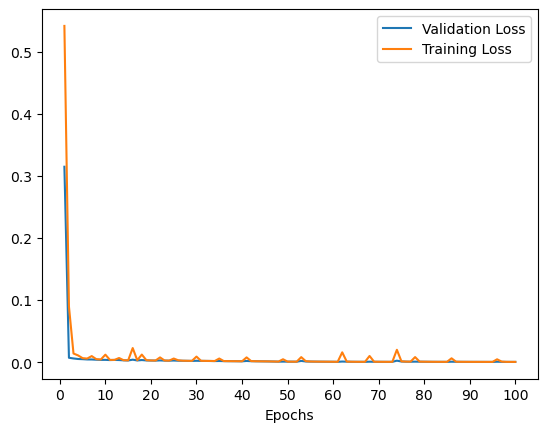

In [125]:
plt.plot(epochs, val_loss1, label='Validation Loss')
plt.plot(epochs, train_loss1, label = 'Training Loss')
plt.legend()
label= range(0, len(train_acc1)+1, 10)
ticks= range(0, len(train_acc1)+1, 10)
plt.xlabel('Epochs')
plt.xticks(ticks,label);

In [126]:
#model1.save('original_model.h5')

In [130]:
model2 = Sequential([
    Dense(12, activation ='relu', input_shape=(21,)),
    Dropout(0.3),
    Dense(7, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='relu'),
    Dense(5,activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1,activation = 'sigmoid')    
])

In [131]:
model2.compile(optimizer='adam',
              metrics='accuracy',
              loss='binary_crossentropy')

In [132]:
callbacks = EarlyStopping(monitor ='val_loss',patience = 5)

In [133]:
history2 = model2.fit(X,y,validation_split= 0.3,batch_size=60,epochs=100,verbose=2,callbacks = callbacks)

Epoch 1/100
1020/1020 - 16s - loss: 0.7434 - accuracy: 0.5952 - val_loss: 0.5708 - val_accuracy: 0.9984 - 16s/epoch - 16ms/step
Epoch 2/100
1020/1020 - 14s - loss: 0.6350 - accuracy: 0.6236 - val_loss: 0.5832 - val_accuracy: 0.7406 - 14s/epoch - 14ms/step
Epoch 3/100
1020/1020 - 14s - loss: 0.5562 - accuracy: 0.7083 - val_loss: 0.5615 - val_accuracy: 0.7582 - 14s/epoch - 14ms/step
Epoch 4/100
1020/1020 - 14s - loss: 0.2601 - accuracy: 0.8891 - val_loss: 0.2268 - val_accuracy: 0.9073 - 14s/epoch - 14ms/step
Epoch 5/100
1020/1020 - 14s - loss: 0.1019 - accuracy: 0.9689 - val_loss: 0.0183 - val_accuracy: 0.9997 - 14s/epoch - 14ms/step
Epoch 6/100
1020/1020 - 14s - loss: 0.0592 - accuracy: 0.9848 - val_loss: 0.0081 - val_accuracy: 0.9996 - 14s/epoch - 13ms/step
Epoch 7/100
1020/1020 - 13s - loss: 0.0573 - accuracy: 0.9850 - val_loss: 0.0032 - val_accuracy: 0.9999 - 13s/epoch - 12ms/step
Epoch 8/100
1020/1020 - 14s - loss: 0.0423 - accuracy: 0.9895 - val_loss: 0.0543 - val_accuracy: 0.9955 

In [134]:
train_acc2 = history2.history['accuracy']
train_loss2 = history2.history['loss']
val_acc2 = history2.history['val_accuracy']
val_loss2 = history2.history['val_loss']

In [141]:
epoch = range(1, len(train_acc2)+1)

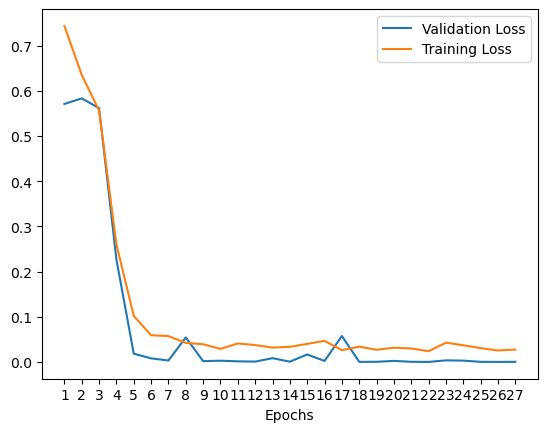

In [142]:
plt.plot(epoch, val_loss2, label='Validation Loss')
plt.plot(epoch, train_loss2, label = 'Training Loss')
plt.legend()
label= epoch
ticks= epoch
plt.xlabel('Epochs')
plt.xticks(ticks,label);